# Decision Tree Regressor

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Loading dataset

In [3]:
dataset = pd.read_csv('D7data1.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Features

In [6]:
x = dataset.iloc[:,:-1].values
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## Class label

In [7]:
y = dataset.iloc[:,-1].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Splitting into training and testing

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

## Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model Building

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 3, random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

## Prediction

In [12]:
y_pred = regressor.predict(x_test)

## Visualization

In [13]:
from sklearn import tree
text = tree.export_text(regressor)
print(text)

|--- feature_12 <= -0.63
|   |--- feature_5 <= 1.64
|   |   |--- feature_5 <= 0.55
|   |   |   |--- value: [24.81]
|   |   |--- feature_5 >  0.55
|   |   |   |--- value: [32.49]
|   |--- feature_5 >  1.64
|   |   |--- feature_10 <= -0.07
|   |   |   |--- value: [46.42]
|   |   |--- feature_10 >  -0.07
|   |   |   |--- value: [28.55]
|--- feature_12 >  -0.63
|   |--- feature_12 <= 0.31
|   |   |--- feature_5 <= 0.44
|   |   |   |--- value: [20.97]
|   |   |--- feature_5 >  0.44
|   |   |   |--- value: [26.52]
|   |--- feature_12 >  0.31
|   |   |--- feature_0 <= 0.29
|   |   |   |--- value: [16.86]
|   |   |--- feature_0 >  0.29
|   |   |   |--- value: [11.86]



[Text(0.5, 0.875, 'x[12] <= -0.628\nsquared_error = 85.144\nsamples = 404\nvalue = 22.612'),
 Text(0.25, 0.625, 'x[5] <= 1.636\nsquared_error = 76.701\nsamples = 139\nvalue = 31.378'),
 Text(0.125, 0.375, 'x[5] <= 0.546\nsquared_error = 37.749\nsamples = 115\nvalue = 28.55'),
 Text(0.0625, 0.125, 'squared_error = 18.273\nsamples = 59\nvalue = 24.807'),
 Text(0.1875, 0.125, 'squared_error = 27.946\nsamples = 56\nvalue = 32.495'),
 Text(0.375, 0.375, 'x[10] <= -0.074\nsquared_error = 41.398\nsamples = 24\nvalue = 44.929'),
 Text(0.3125, 0.125, 'squared_error = 14.535\nsamples = 22\nvalue = 46.418'),
 Text(0.4375, 0.125, 'squared_error = 44.222\nsamples = 2\nvalue = 28.55'),
 Text(0.75, 0.625, 'x[12] <= 0.315\nsquared_error = 28.117\nsamples = 265\nvalue = 18.014'),
 Text(0.625, 0.375, 'x[5] <= 0.436\nsquared_error = 13.419\nsamples = 132\nvalue = 21.601'),
 Text(0.5625, 0.125, 'squared_error = 8.847\nsamples = 117\nvalue = 20.97'),
 Text(0.6875, 0.125, 'squared_error = 21.776\nsamples = 

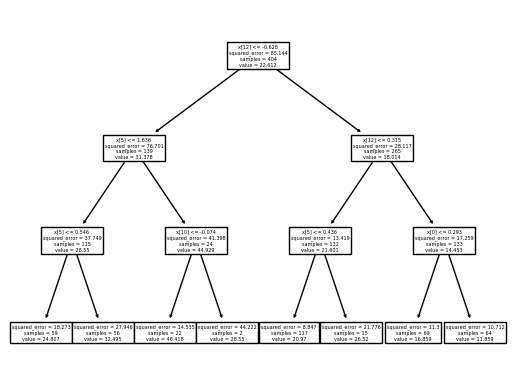

In [14]:
tree.plot_tree(regressor)

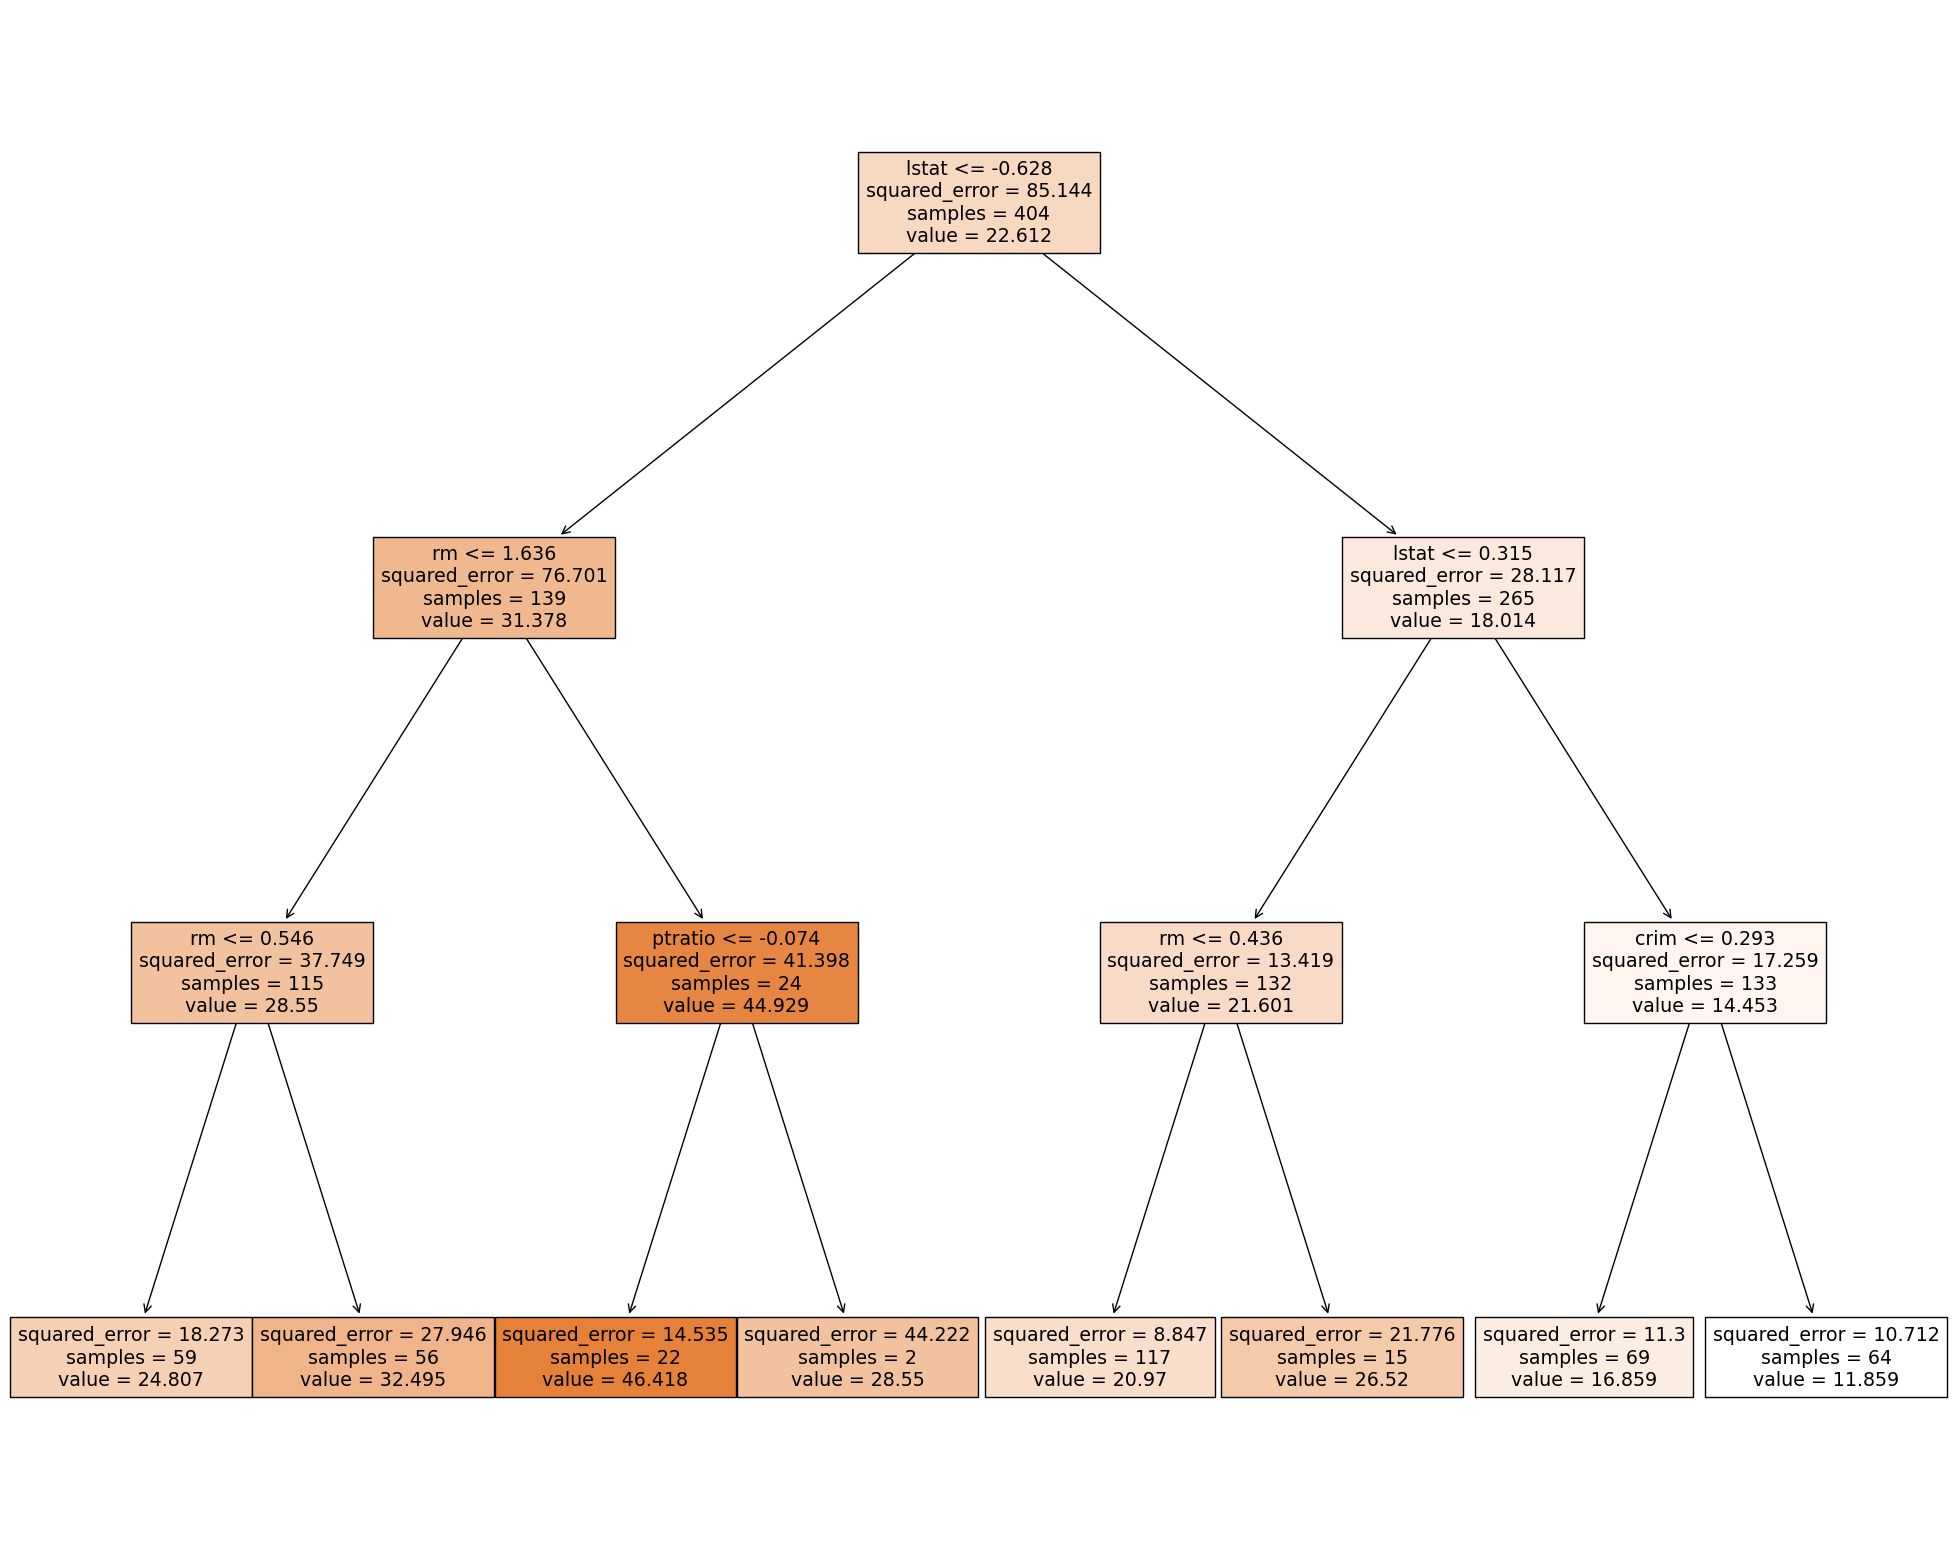

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=dataset.columns, filled = True)

## Evaluation

### R Squared value

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test,y_pred)

0.5741235873119132

In [18]:
r2_score(y_pred,y_test)

0.39285252796920167